# Conditional Graph

In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [4]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    finalNumber1: int
    finalNumber2: int

def adder(state: AgentState) -> AgentState:
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_next_node(state: AgentState) -> str:
    if state["operation1"] == "+":
        return "addition_operation"
    if state["operation1"] == "-":
        return "subtraction_operation"   


In [7]:
graph = StateGraph(AgentState)

graph.add_node("router", lambda state:state)
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_node("router2", lambda state:state)
graph.add_conditional_edges(
    "router2",
    decide_next_node,
    {
        "addition_operation": "add_node2",
        "subtraction_operation": "subtract_node2"
    }
)
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")


graph.add_node("add_node2", adder)
graph.add_node("subtract_node2", subtractor)
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

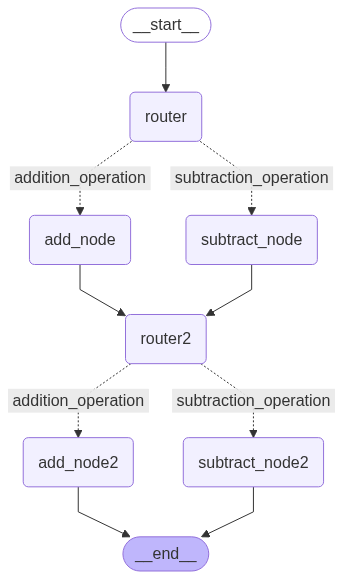

In [ ]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

# Looping Graph

In [9]:
import random
from typing import Dict, List, TypedDict

class AgentState(TypedDict):
    name: str
    counter: int
    number: List[int]

def greeting_node(state: AgentState) -> AgentState:
    state["name"] = f"Hey, {state['name']}! Let's do some random math."
    state["counter"] = 0
    return state

def random_node(state: AgentState) -> AgentState:
    state["number"] = random.randint(1, 10)
    state["counter"] += 1
    return state

def should_continue(state: AgentState) -> str:
    if state["counter"] < 5:
        print(f"Entering loop with counter: {state['counter']}")
        return "loop"
    else:
        return "exit"

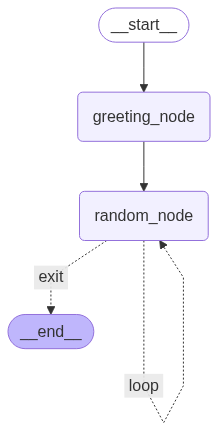

In [10]:
graph = StateGraph(AgentState)
graph.add_node("greeting_node", greeting_node)
graph.add_node("random_node", random_node)
graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "random_node")

graph.add_conditional_edges(
    "random_node",
    should_continue,
    {
        "loop": "random_node",
        "exit": END
    }
)

app = graph.compile()
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))